# Name data : `common_B0TODst3pi_Dst_constr`
## BDT: `gradient`

# Evolution of the relative statistical uncertainty $\frac{\Delta S}{S}$ as a function of the BDT
- Computation of the FoM and the relative uncertainty $\frac{\Delta S}{S}$ as a function of the BDT cut to choose the optimal BDT cut
- ROC curve
- Optimal fitted yield and uncertainty of the normalisation mode

In [1]:
name_data = "common_B0TODst3pi_Dst_constr"
name_BDT = 'gradient'

## Import

In [3]:
import numpy as np
import json

from bd2dst3pi.locations import loc

import sys
sys.path.append(loc.SCRIPTS)
from plot.line import plot_x_list_ys
from load_save_data import retrieve_params
from uncertainties import ufloat, unumpy, umath
from plot.tool import save_file

Welcome to JupyROOT 6.22/02


## Tool functions

In [4]:
def get_index_max(L):
    idx = 0
    candidate_max = L[0]
    for i in range(1, len(L)):
        if candidate_max < L[i]:
            candidate_max = L[i]
            idx = i
    return idx

def efficiency(N):
    return np.array(N/N[0])

## Load data

we define the usual average $\sigma = f\times \sigma_L + (1-f) \sigma_R$ of the full `common` signal shape.

Then, `n_B` or $B$ is the number of combinatorial under the signal peak, computed with an integral over $\mu\pm3\sigma$ under the signal peak.

### List of BDT values

`l_BDT = [-4, -3.75, ..., 1.75]`

In [5]:
def round_int(n):
    if n%1==0:
        return int(n)
    else:
        return n

l_BDT = []
l_BDT_ref = []
starting_value = -4
end_value      =  1.75
step           = 0.5
sub_step        = 0.25

value = starting_value
while value <= end_value:
    eff_step = sub_step if value >= -6 else step
    if value==0:
        value = 0
    l_BDT.append(round_int(value))    
    value = np.round(value + eff_step, 3)


In [6]:
l_BDT

[-4,
 -3.75,
 -3.5,
 -3.25,
 -3,
 -2.75,
 -2.5,
 -2.25,
 -2,
 -1.75,
 -1.5,
 -1.25,
 -1,
 -0.75,
 -0.5,
 -0.25,
 0,
 0.25,
 0.5,
 0.75,
 1,
 1.25,
 1.5,
 1.75]

### Retrieve the results of the fit for the different BDT cuts
- `lS`: list of ufloat, the fitted $B^0 \to D^{*-} 3\pi$ yield for each BDT cut
- `lB_combi`: list of ufloat, the background under the signal peak
- `ltot = lS + lB_combi`


In [7]:
lS = [] # Signal B0 -> Ds 3pi
lB_combi = [] # combinatorial background, computed with sigma as the 'usual' mean of sigmaL and sigmaR

for i, BDT in enumerate(l_BDT):
    
    params = retrieve_params(name_data+f'_BDT{BDT}', name_folder=name_data)

    lB_combi.append(ufloat(params['n_B'], params['n_B_err'])) # combinatorial   
    lS.append(ufloat(params[f'n_sig|BDT{BDT}'],params[f'n_sig|BDT{BDT}_err']))


lS = np.array(lS)
lB_combi = np.array(lB_combi)

ltot = lS + lB_combi
squareRootltot = unumpy.sqrt(ltot)

## Optimisation

### Minimise $\frac{\Delta S}{S}$
`index_min` is so that `l_BDT[index_min]` is the cut that minimises $\frac{\Delta S}{S}$

In [8]:
rel_uncertainty = unumpy.nominal_values(unumpy.std_devs(lS)/lS)

index_min = 0
min_pot = rel_uncertainty[0]
for i, v in enumerate(rel_uncertainty):
    if min_pot > v:
        min_pot = v
        index_min = i

print(l_BDT[index_min])

-1.25


## Define FoM

- Signal purity: $\frac{S}{S+B}$
- Signal significance: $\frac{S}{\sqrt{S+B}}$
- Figure of merit: $\frac{S}{S+B}\frac{S}{\sqrt{S+B}}$

In [8]:
signal_purity = lS/ltot
signal_significance = lS/squareRootltot
FoM = signal_purity*signal_significance

## Variation of $S$, $B$, ... as a function of the BDT

### S, B

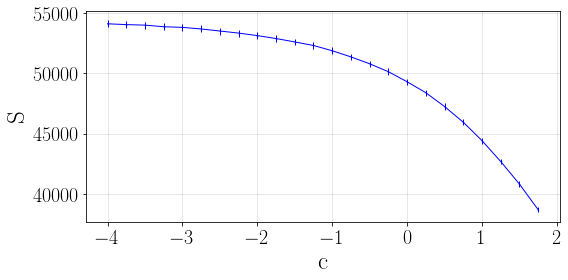

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/common_B0TODst3pi_Dst_constr/c_vs_S


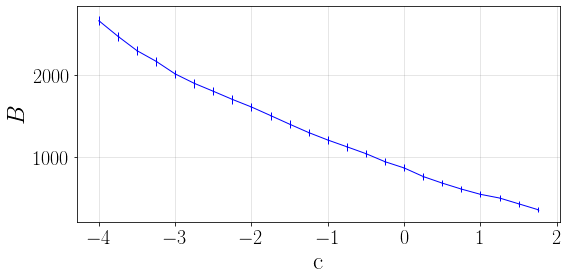

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/common_B0TODst3pi_Dst_constr/c_vs_B


(<Figure size 576x288 with 1 Axes>, <AxesSubplot:xlabel='c', ylabel='$B$'>)

In [236]:
plot_x_list_ys(l_BDT, lS, 'c', 
               ['S'], surnames_y=['S'],
               name_folder=name_data)

plot_x_list_ys(l_BDT, lB_combi, 'c', 
               ['$B$'],
               name_folder=name_data)

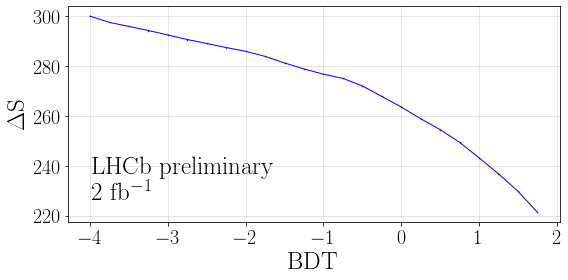

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/common_B0TODst3pi_Dst_constr/BDT_vs_S_err


(<Figure size 576x288 with 1 Axes>,
 <AxesSubplot:xlabel='BDT', ylabel='$\\Delta $S'>)

In [237]:
plot_x_list_ys(l_BDT, unumpy.std_devs(lS), 'BDT', 
               ['S_err'], surnames_y=['$\Delta $S'],
               name_folder=name_data, pos_text_LHC=[0.05, 0.3, 'left'])

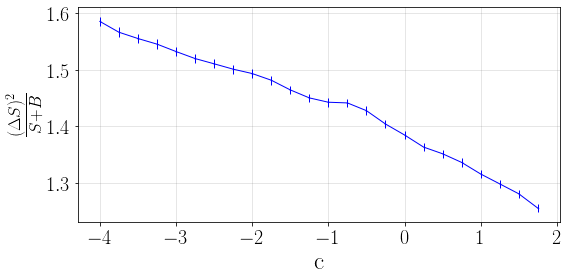

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/common_B0TODst3pi_Dst_constr/c_vs_S_err2_d_S+B


(<Figure size 576x288 with 1 Axes>,
 <AxesSubplot:xlabel='c', ylabel='$\\frac{(\\Delta S)^2}{S+B}$'>)

In [238]:
plot_x_list_ys(l_BDT, np.square(unumpy.std_devs(lS))/ltot, 'c', 
               ['S_err2_d_S+B'], surnames_y=['$\\frac{(\\Delta S)^2}{S+B}$'],
               name_folder=name_data)

### $\frac{\Delta S}{S}$ as a function of the BDT cut

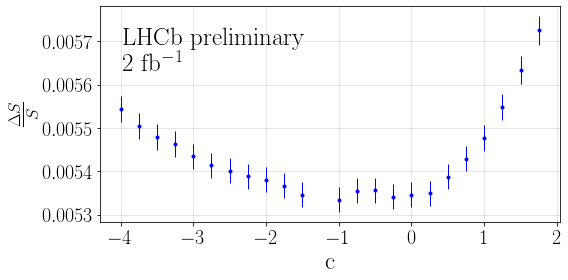

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/common_B0TODst3pi_Dst_constr/BDT_vs_S_err_d_S
0.005330+/-0.000028


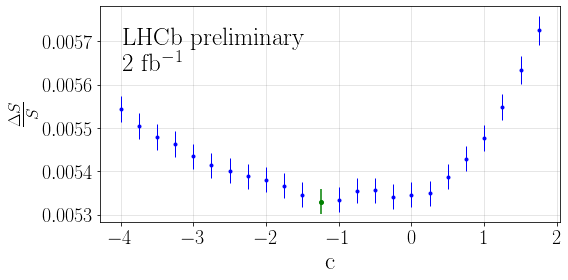

In [10]:
l_BDT_reduced = l_BDT[:index_min] + l_BDT[index_min+1:] 
deltaS_overS = np.delete(unumpy.std_devs(lS)/lS, index_min)

BDT_opt = l_BDT[index_min]
deltaS_overS_opt = unumpy.std_devs(lS)[index_min]/lS[index_min]

fig, ax = plot_x_list_ys(l_BDT_reduced, deltaS_overS, 'c', 
               ['S_err_d_S'], surnames_y=['$\\frac{\\Delta S}{S}$'],
               name_folder=name_data, pos_text_LHC=[0.05, 0.9, 'left'],
                         save_fig=False, linestyle='', marker='o', markersize=3.,
                         name_file='BDT_vs_S_err_d_S')

ax.errorbar([BDT_opt], [deltaS_overS_opt.nominal_value], 
            yerr=[deltaS_overS_opt.std_dev], 
            color='green', markerfacecolor='green', markersize=4., marker='o')

save_file(fig, 'BDT_vs_S_err_d_S', name_folder=name_data)
print(min(unumpy.std_devs(lS)/lS))
fig

#### Zoom

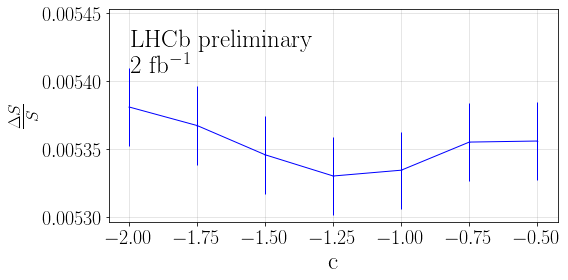

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/common_B0TODst3pi_Dst_constr/BDT_vs_S_err_d_S_global


0.0053301923898283875+/-2.841095091258446e-05

In [241]:
plot_x_list_ys(l_BDT[8:15], unumpy.std_devs(lS)[8:15]/lS[8:15], 'c', 
               ['S_err_d_S'], surnames_y=['$\\frac{\\Delta S}{S}$'],
               name_folder=name_data, factor_ymax=1.007, pos_text_LHC=[0.05, 0.9, 'left'], name_file='BDT_vs_S_err_d_S_global')
min(unumpy.std_devs(lS)/lS)

### FoM as a function of the BDT

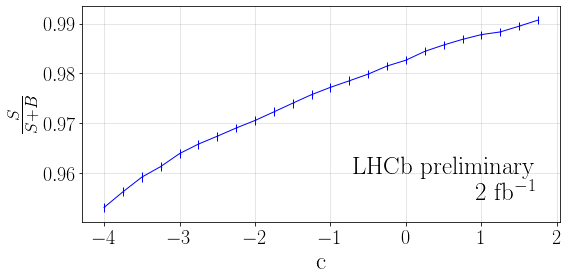

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/common_B0TODst3pi_Dst_constr/c_vs_Signal_purity


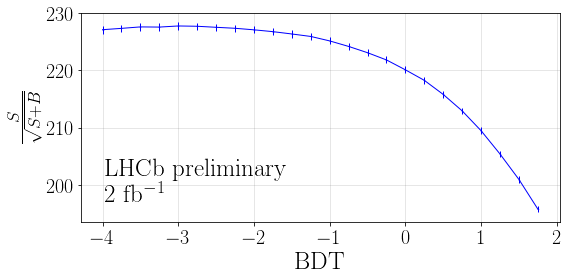

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/common_B0TODst3pi_Dst_constr/BDT_vs_Signal_significance


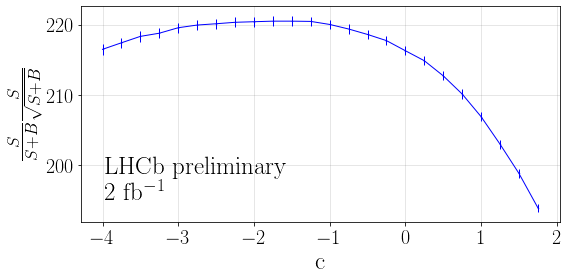

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/common_B0TODst3pi_Dst_constr/c_vs_FoM


(<Figure size 576x288 with 1 Axes>,
 <AxesSubplot:xlabel='c', ylabel='$\\frac{S}{S+B}\\frac{S}{\\sqrt{S+B}}$'>)

In [239]:
plot_x_list_ys(l_BDT, [signal_purity], 'c', 'Signal purity', 
               surnames_y='$\\frac{S}{S+B}$',
               name_folder=name_data, pos_text_LHC=[0.95, 0.3, 'right'])
plot_x_list_ys(l_BDT, [signal_significance], 'BDT', 
               'Signal significance',  surnames_y='$\\frac{S}{\\sqrt{S+B}}$',
               name_folder=name_data, pos_text_LHC=[0.05, 0.3, 'left'])
plot_x_list_ys(l_BDT, [FoM], 'c', 
               'FoM',surnames_y='$\\frac{S}{S+B}\\frac{S}{\\sqrt{S+B}}$',
               pos_text_LHC=[0.05, 0.3, 'left'],
               name_folder=name_data)

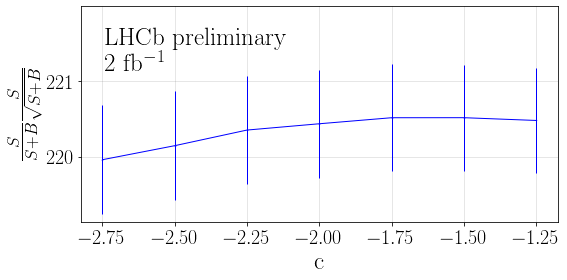

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/common_B0TODst3pi_Dst_constr/BDT_vs_FoM_max


(<Figure size 576x288 with 1 Axes>,
 <AxesSubplot:xlabel='c', ylabel='$\\frac{S}{S+B}\\frac{S}{\\sqrt{S+B}}$'>)

In [244]:
start = 5
stop = 12
plot_x_list_ys(l_BDT[start:stop], FoM[start:stop], 'c', 
               'FoM',
               surnames_y='$\\frac{S}{S+B}\\frac{S}{\\sqrt{S+B}}$', name_file='BDT_vs_FoM_max',
               name_folder=name_data, factor_ymax=1.003, pos_text_LHC=[0.05, 0.9, 'left'])

### ROC curve

In [12]:
S_efficiency = efficiency(lS)
B_efficiency = efficiency(lB_combi)

In [13]:
l_BDT_label = []
for BDT in l_BDT:
    value = BDT if int(BDT)==BDT and BDT > -7 else None
    l_BDT_label.append(value)

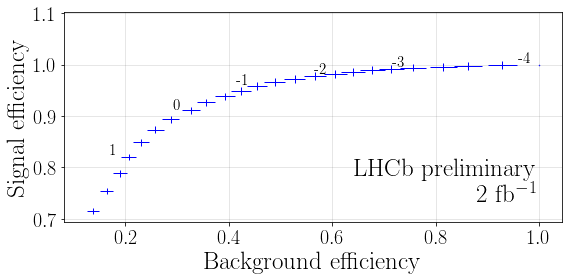

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/common_B0TODst3pi_Dst_constr/Background_efficiency_vs_Signal_efficiency


(<Figure size 576x288 with 1 Axes>,
 <AxesSubplot:xlabel='Background efficiency', ylabel='Signal efficiency'>)

In [249]:
plot_x_list_ys(B_efficiency, S_efficiency, 'Background efficiency', 
               'Signal efficiency',
               name_folder=name_data, linestyle='', annotations=l_BDT_label, factor_ymax=1.08, 
               pos_text_LHC=[0.95, 0.3, 'right'])

In [14]:
Seffmin = S_efficiency[index_min]
Blossmin = 1 - B_efficiency[index_min]

In [15]:
S_eff_withoutBest = np.delete(S_efficiency, index_min)
B_eff_withoutBest = np.delete(B_efficiency, index_min)
l_BDT_label = l_BDT_label[:index_min] + l_BDT_label[index_min+1:]

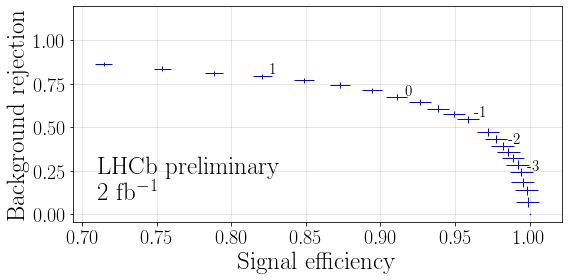

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/common_B0TODst3pi_Dst_constr/signal_efficiency_vs_vs_background_rejection


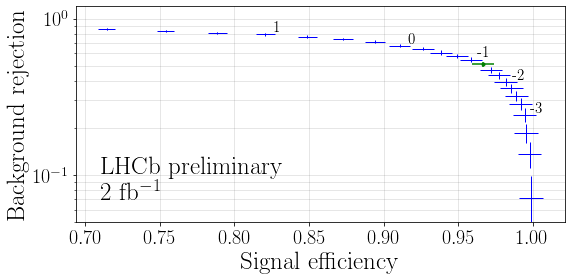

In [16]:
fig, ax = plot_x_list_ys(S_eff_withoutBest, 1 - B_eff_withoutBest, 'Signal  efficiency', 
               'Background rejection',
               name_folder=name_data, linestyle='', annotations=l_BDT_label, factor_ymax=1.3, 
                fontsize_annot=15., pos_text_LHC=[0.05, 0.3, 'left'],
               space_x=12, space_y=6, save_fig=False)
ax.errorbar([Seffmin.nominal_value], [Blossmin.nominal_value], 
            xerr=Seffmin.std_dev, yerr=Blossmin.std_dev, 
            color='green', markersize=3., marker='o')
ax.set_yscale('log')
ax.set_ylim(0.05,1.2)
save_file(fig, 'signal_efficiency_vs_vs_background_rejection', name_folder=name_data)
fig

## Result of the optimal cut

In [251]:
import json
from bd2dst3pi.locations import loc

In [252]:
BDT=-1.25
# Parameters of the optimal cut
params_opt = retrieve_params(name_data+f'_BDT{BDT}', name_folder=name_data)   
# Parameters of the fit to the data with no BDT cut
params = retrieve_params(name_data, name_folder=name_data) 

In [253]:
DeltaSoverS_opt = params_opt[f"n_sig|BDT{BDT}_err"]/params_opt[f"n_sig|BDT{BDT}"]
DeltaSoverS = params[f"n_sig_err"]/params[f"n_sig"]

### Relative uncertainty $\frac{\Delta S}{S}$ for the optimal and the no-BDT cut fit

In [254]:
print("optimal: ", DeltaSoverS_opt)
print("No cuts: ", DeltaSoverS)

optimal:  0.0053301923898283875
No cuts:  0.02262394580343417


### Optimised yield

In [255]:
params_opt[f'n_sig|BDT{BDT}']

52321.955341015375

### Optimised statistical uncertainty on the yield

In [256]:
params_opt[f'n_sig|BDT{BDT}_err']

278.8860881796209